In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Create a reference the CSV file desired
enrollment_csv = "Enrollment -- 12-Month Enrollment Rates 2001-17/Comprehensive 12-Month Enrollment Rates 2001-17.csv"

# Read the CSV into a Pandas DataFrame
enrollment_df = pd.read_csv(enrollment_csv)

# Print the first five rows of data to the screen
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total,IDX_EF
0,100654,Alabama A & M University,2001,Undergraduate,4693,-2
1,100663,University of Alabama at Birmingham,2001,Undergraduate,12910,-2
2,100706,University of Alabama in Huntsville,2001,Undergraduate,6529,-2
3,100724,Alabama State University,2001,Undergraduate,5228,-2
4,100751,The University of Alabama,2001,Undergraduate,16983,-2


In [3]:
# How many institutions are we starting with?
totalInstitutions = len(enrollment_df)
print(totalInstitutions)

90267


In [4]:
# Delete columns that we're not interested in (The variable IDX_EF contains the UNITID of the parent institution.)
enrollment_df = enrollment_df.drop(["IDX_EF"], axis=1)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001,Undergraduate,4693
1,100663,University of Alabama at Birmingham,2001,Undergraduate,12910
2,100706,University of Alabama in Huntsville,2001,Undergraduate,6529
3,100724,Alabama State University,2001,Undergraduate,5228
4,100751,The University of Alabama,2001,Undergraduate,16983


In [5]:
# Remove the rows with missing data
enrollment_df = enrollment_df.dropna(how="any")
institutionsMinusBlanks = len(enrollment_df)
print(institutionsMinusBlanks)

90266


In [6]:
# How many institutions had data that wasn't incuded?
instutionsWithoutData = (totalInstitutions - institutionsMinusBlanks)
print(instutionsWithoutData)

1


In [7]:
# Count how many Institution entries do we have per year
InstitutionYearCounts = enrollment_df["year"].value_counts()
print(InstitutionYearCounts)

2017    6330
2016    6275
2015    6174
2014    6038
2013    5891
2012    5751
2011    5607
2010    5409
2009    5176
2008    5025
2007    4910
2006    4841
2005    4762
2004    4682
2003    4604
2002    4522
2001    4253
year      16
Name: year, dtype: int64


In [13]:
InstitutionYearCounts = InstitutionYearCounts.drop(index="year")
print(InstitutionYearCounts)

2017    6330
2016    6275
2015    6174
2014    6038
2013    5891
2012    5751
2011    5607
2010    5409
2009    5176
2008    5025
2007    4910
2006    4841
2005    4762
2004    4682
2003    4604
2002    4522
2001    4253
Name: year, dtype: int64


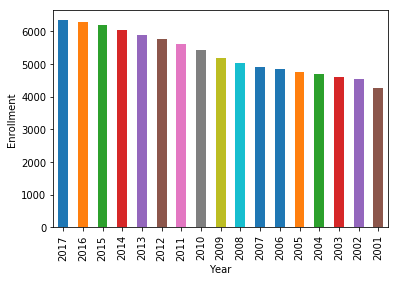

<Figure size 432x288 with 0 Axes>

In [41]:
# Create a bar chart based off of the group series from before
institutionCountBar = InstitutionYearCounts.plot(kind='bar')

# Set the xlabel and ylabel using class methods
institutionCountBar.set_xlabel("Year")
institutionCountBar.set_ylabel("Enrollment")


plt.show()
plt.tight_layout()

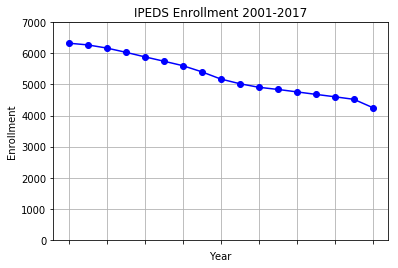

In [39]:
institutionCountLine = InstitutionYearCounts.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCountLine.set_ylim(ymin=0, ymax=7000)
plt.title("IPEDS Enrollment 2001-2017")
plt.xlabel("Year")
plt.ylabel("Enrollment")
plt.grid()

In [ ]:
#Enrollment numbers = sum EF2001D1.Grand total per year
#Loop through years and add EF2001D1.Grand total if years match


In [10]:
# DATA FAULT: This data is not comprehensive. ONLY institutions that apply for federal funding have to provide this information.
# So... more and more institutions are reporting their enrollment data...
# If we simply total enrollments per year from this dataset, it could look like enrollment rates are increasing, 
# when in reality we're just getting more data from new sources. 
# How do we more accurately show the data? Average? Enrollments/Institution? 